# The perceptron
> The OG neural net classifier without any bells and whistles.

References:
* https://en.wikipedia.org/wiki/Perceptron#Steps

Fun facts:
* Dates back to _McCullock and Pitts 1943, A logical calculus of the ideas immanent in nervous activity_
* Was only first mechanically implemented by _Rosenblatt 1953, The perceptron: A probabilistic model for information storage and organization in the brain_

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.datasets as sk_datasets
from sklearn import metrics

import random_neural_net_models.perceptron as perceptron

In [3]:
rng = np.random.RandomState(42)

## Binary classification

[12:17:26] DEBUG    matplotlib.pyplot: DEBUG - Loaded backend                                         ]8;id=107300;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py\pyplot.py]8;;\:]8;id=939815;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py#339\339]8;;\
                    module://matplotlib_inline.backend_inline version unknown.                                     

           DEBUG    matplotlib.pyplot: DEBUG - Loaded backend                                         ]8;id=340271;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py\pyplot.py]8;;\:]8;id=599203;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/pyplot.py#339\339]8;;\
                    module://matplotlib_inline.backend_inline version unknown.                                     

           DEBUG    matplotlib.font_manager: DEBUG - findfont: Matching                        ]8;id=547634;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=134642;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1378\1378]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0.                                                                                          

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=395255;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=317010;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSa                     
                    nsMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=636495;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=675484;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmb10.tt                     
                    f', name='cmb10', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=379836;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=260906;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizF                     
                    ourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=573533;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=473565;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSe                     
                    rif.ttf', name='DejaVu Serif', style='normal', variant='normal',                               
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=750933;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=971526;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizT                     
                    hreeSymBol.ttf', name='STIXSizeThreeSym', style='normal',                                      
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=489269;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=826262;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSa                     
                    nsDisplay.ttf', name='DejaVu Sans Display', style='normal',                                    
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=827436;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=391729;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSe                     
                    rifDisplay.ttf', name='DejaVu Serif Display', style='normal',                                  
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=922787;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=741697;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizO                     
                    neSymReg.ttf', name='STIXSizeOneSym', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=292989;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=454705;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizT                     
                    woSymReg.ttf', name='STIXSizeTwoSym', style='normal', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=781243;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=242571;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonU                     
                    niBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal',                        
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=769755;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=664886;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSa                     
                    nsMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique',                                 
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05                      

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=968723;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=467218;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSe                     
                    rif-Bold.ttf', name='DejaVu Serif', style='normal', variant='normal',                          
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=806916;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=199941;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGene                     
                    ralItalic.ttf', name='STIXGeneral', style='italic', variant='normal',                          
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=655720;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=560605;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonU                     
                    ni.ttf', name='STIXNonUnicode', style='normal', variant='normal',                              
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=357831;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=447701;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGene                     
                    ralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal',                          
                    weight=700, stretch='normal', size='scalable')) = 11.335                                       

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=389071;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=244979;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSe                     
                    rif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=521049;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=184605;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizF                     
                    ourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal',                      
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=388545;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=837842;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonU                     
                    niIta.ttf', name='STIXNonUnicode', style='italic', variant='normal',                           
                    weight=400, stretch='normal', size='scalable')) = 11.05                                        

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=469150;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=623782;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizT                     
                    hreeSymReg.ttf', name='STIXSizeThreeSym', style='normal',                                      
                    variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05                      

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=951726;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=549390;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.t                     
                    tf', name='cmmi10', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=772709;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=804275;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSa                     
                    ns.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400,                     
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=715293;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=560323;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSa                     
                    ns-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal',                        
                    weight=400, stretch='normal', size='scalable')) = 1.05                                         

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=16133;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=756000;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonU                     
                    niBol.ttf', name='STIXNonUnicode', style='normal', variant='normal',                           
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=483610;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=208141;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizF                     
                    iveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal',                      
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=819035;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=774057;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGene                     
                    ralBol.ttf', name='STIXGeneral', style='normal', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=650075;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=401880;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmex10.t                     
                    tf', name='cmex10', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=762180;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=38291;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmr10.tt                     
                    f', name='cmr10', style='normal', variant='normal', weight=400,                                
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=10257;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=245722;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizT                     
                    woSymBol.ttf', name='STIXSizeTwoSym', style='normal', variant='normal',                        
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=308213;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=815822;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSa                     
                    nsMono-Bold.ttf', name='DejaVu Sans Mono', style='normal',                                     
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335                     

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=727597;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=521149;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmtt10.t                     
                    tf', name='cmtt10', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=209228;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=640731;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.t                     
                    tf', name='cmss10', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=916584;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=337054;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizO                     
                    neSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal',                        
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=419382;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=237920;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSa                     
                    ns-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal',                            
                    weight=700, stretch='normal', size='scalable')) = 0.33499999999999996                          

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=641642;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=11098;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSa                     
                    ns-BoldOblique.ttf', name='DejaVu Sans', style='oblique',                                      
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335                      

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=830010;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=404536;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSa                     
                    nsMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique',                             
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=290252;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=110550;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.t                     
                    tf', name='cmsy10', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=678847;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=149322;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSe                     
                    rif-BoldItalic.ttf', name='DejaVu Serif', style='italic',                                      
                    variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335                     

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=961515;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=629313;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/home/eric/wsl_PetProjects/random-neural-net-models                     
                    /.venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGene                     
                    ral.ttf', name='STIXGeneral', style='normal', variant='normal',                                
                    weight=400, stretch='normal', size='scalable')) = 10.05                                        

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=15132;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=516031;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.tt                     
                    f', name='DejaVu Sans', style='normal', variant='normal', weight=700,                          
                    stretch='normal', size='scalable')) = 0.33499999999999996                                      

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=259525;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=274317;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bol                     
                    d.ttf', name='DejaVu Sans Mono', style='normal', variant='normal',                             
                    weight=700, stretch='normal', size='scalable')) = 10.335                                       

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=474263;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=751873;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf                     
                    ', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400,                      
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=294637;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=484500;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf',                      
                    name='DejaVu Serif', style='normal', variant='normal', weight=400,                             
                    stretch='normal', size='scalable')) = 10.05                                                    

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=65112;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=722082;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.t                     
                    tf', name='DejaVu Serif', style='normal', variant='normal', weight=700,                        
                    stretch='normal', size='scalable')) = 10.335                                                   

           DEBUG    matplotlib.font_manager: DEBUG - findfont:                                 ]8;id=432081;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=316497;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1390\1390]8;;\
                    score(FontEntry(fname='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',                       
                    name='DejaVu Sans', style='normal', variant='normal', weight=400,                              
                    stretch='normal', size='scalable')) = 0.05                                                     

           DEBUG    matplotlib.font_manager: DEBUG - findfont: Matching                        ]8;id=512682;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py\font_manager.py]8;;\:]8;id=849880;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/font_manager.py#1419\1419]8;;\
                    sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=                     
                    10.0 to DejaVu Sans                                                                            
                    ('/home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11                     
                    /site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score                       
                    of 0.050000.                                                                                   

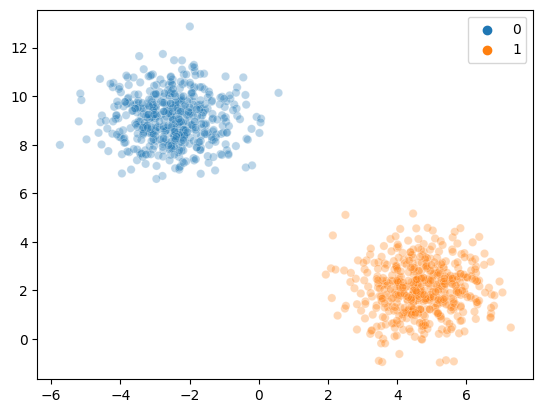

In [4]:
X, y = sk_datasets.make_blobs(
    n_samples=1_000,
    n_features=2,
    centers=2,
    random_state=rng,
)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, alpha=0.3);

In [8]:
model = perceptron.PerceptronClassifier(epochs=10, verbose=True)

In [9]:
model.fit(X, y)

[12:17:41] DEBUG    perceptron: DEBUG - Two classes detected ([0 1]), treating as two-class       ]8;id=257638;file:///home/eric/wsl_PetProjects/random-neural-net-models/src/random_neural_net_models/perceptron.py\perceptron.py]8;;\:]8;id=621876;file:///home/eric/wsl_PetProjects/random-neural-net-models/src/random_neural_net_models/perceptron.py#109\109]8;;\
                    problem.                                                                                       

100%|██████████| 10/10 [00:00<00:00, 3559.62it/s]


PerceptronClassifier(epochs=10, verbose=True)

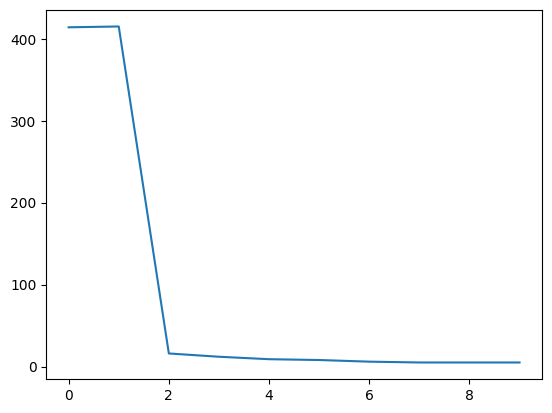

In [10]:
sns.lineplot(x=range(model.epochs), y=model.errors_);

In [11]:
y_hat = model.predict(X)
y_hat[:5]

array([0., 1., 1., 1., 1.], dtype=float32)

In [13]:
print(metrics.classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       500
           1       1.00      0.99      0.99       500

    accuracy                           0.99      1000
   macro avg       1.00      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000



In [14]:
x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X0, X1 = np.meshgrid(x0, x1)
X_plot = np.array([X0.ravel(), X1.ravel()]).T

In [15]:
y_pred = model.predict(X_plot)

[12:17:50] DEBUG    matplotlib.colorbar: DEBUG - locator: <matplotlib.ticker.AutoLocator object at  ]8;id=716595;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:]8;id=992684;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/colorbar.py#876\876]8;;\
                    0x7f36614a7310>                                                                                

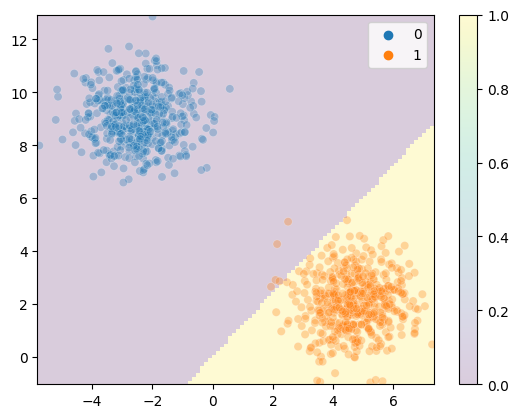

In [16]:
fig, ax = plt.subplots()
im = ax.pcolormesh(X0, X1, y_pred.reshape(X0.shape), alpha=0.2)
fig.colorbar(im, ax=ax)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax, alpha=0.3)
plt.show()

## Multi-class classification

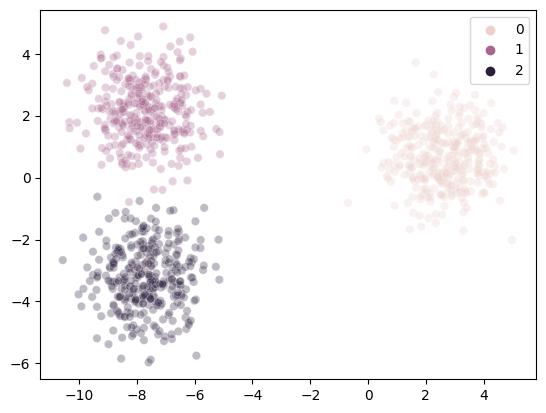

In [17]:
X, y = sk_datasets.make_blobs(
    n_samples=1_000,
    n_features=2,
    centers=3,
    random_state=rng,
)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, alpha=0.3);

In [24]:
model = perceptron.PerceptronClassifier(epochs=10, verbose=True)

In [25]:
model.fit(X, y)

[12:18:31] DEBUG    perceptron: DEBUG - More than two classes detected ([0 1 2]), treating as     ]8;id=346825;file:///home/eric/wsl_PetProjects/random-neural-net-models/src/random_neural_net_models/perceptron.py\perceptron.py]8;;\:]8;id=105736;file:///home/eric/wsl_PetProjects/random-neural-net-models/src/random_neural_net_models/perceptron.py#106\106]8;;\
                    multi-class problem.                                                                           

100%|██████████| 10/10 [00:00<00:00, 4341.03it/s]


PerceptronClassifier(epochs=10, verbose=True)

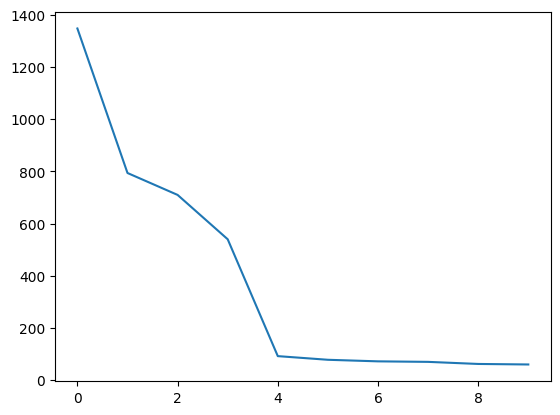

In [26]:
sns.lineplot(x=range(model.epochs), y=model.errors_);

In [27]:
y_hat = model.predict(X)
y_hat[:5]

array([2, 1, 0, 1, 1])

In [28]:
print(metrics.classification_report(y, y_hat))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       334
           1       0.93      1.00      0.97       333
           2       0.99      0.99      0.99       333

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



In [29]:
X.shape

(1000, 2)

In [34]:
x0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X0, X1 = np.meshgrid(x0, x1)
X_plot = np.array([X0.ravel(), X1.ravel()]).T

In [35]:
y_pred = model.predict(X_plot)

In [36]:
y_pred.reshape(X0.shape)

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

[12:18:59] DEBUG    matplotlib.colorbar: DEBUG - locator: <matplotlib.ticker.AutoLocator object at  ]8;id=674292;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/colorbar.py\colorbar.py]8;;\:]8;id=478343;file:///home/eric/wsl_PetProjects/random-neural-net-models/.venv/lib/python3.11/site-packages/matplotlib/colorbar.py#876\876]8;;\
                    0x7f3659168110>                                                                                

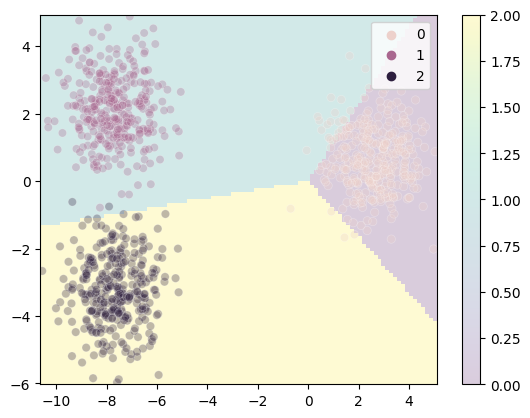

In [37]:
fig, ax = plt.subplots()
im = ax.pcolormesh(X0, X1, y_pred.reshape(X0.shape), alpha=0.2)
fig.colorbar(im, ax=ax)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, ax=ax, alpha=0.3)
plt.show()